In [61]:
# Importing required packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [63]:
# This contains the link to the CSV file hosted on GitHub.
train_URL = 'https://raw.githubusercontent.com/amirbek-akramov/SatisfactionOfAirlinePassengers/main/train_dataset.csv'
test_URL = 'https://raw.githubusercontent.com/amirbek-akramov/SatisfactionOfAirlinePassengers/main/test_dataset.csv'

#Reads the CSV file from the URL and loads it into a pandas DataFrame.
train_df = pd.read_csv(train_URL)
test_df = pd.read_csv(test_URL)

# Displays the first 5 rows of the DataFrame to give you a quick view of the data.
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [64]:
# Shape of the train_df
train_df.shape

(10000, 24)

In [65]:
# This line removes the column named 'id' from the DataFrame and "inplace=True" directly saves it
train_df.drop(columns='id', inplace=True)

In [66]:
# Description of the train_df
train_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [67]:
# Information about train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int6

Text(0, 0.5, ' ')

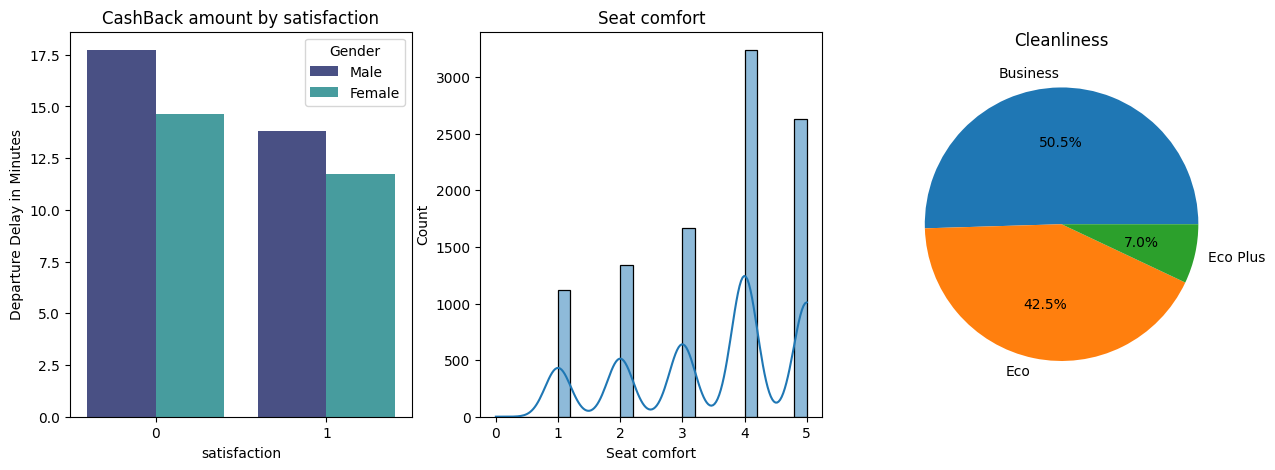

In [68]:
# Graphing the train DataFrame
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# satisfaction
sns.barplot(data=train_df, x='satisfaction', y='Departure Delay in Minutes', hue='Gender', palette='mako',  errorbar=None, ax=axes[0])
axes[0].set_title('CashBack amount by satisfaction')

# Seat comfort
sns.histplot(train_df['Seat comfort'], kde=True, bins=25, ax=axes[1])

axes[1].set_title('Seat comfort')

# Class
train_df['Class'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('Cleanliness')
axes[2].set_ylabel(" ")


Text(0.5, 1.0, 'Customer Type by Mode Distribution')

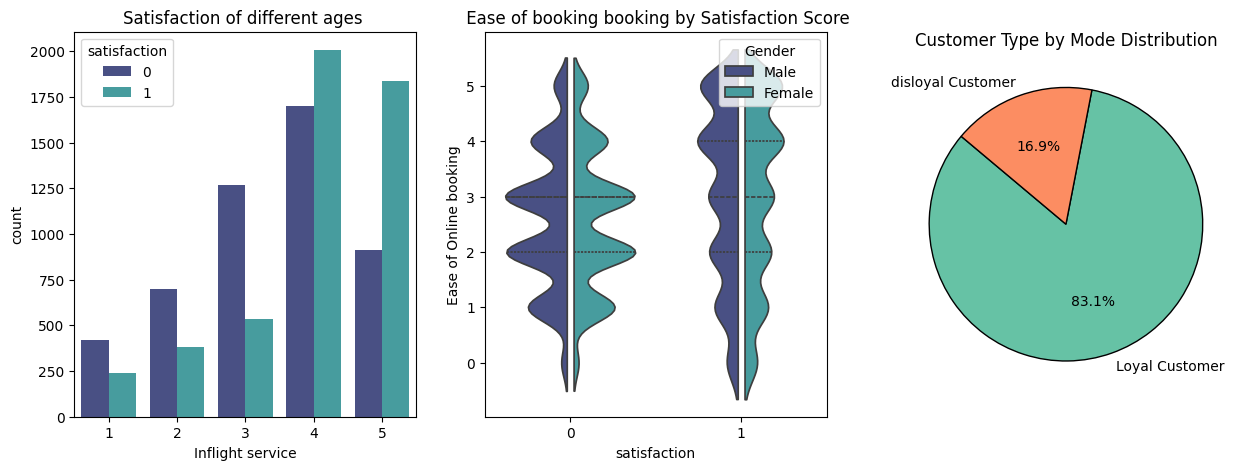

In [69]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Age
sns.countplot(data=train_df, x='Inflight service', hue='satisfaction', palette='mako', ax=axes[0])
axes[0].set_title("Satisfaction of different ages ")


# Ease of Online booking
sns.violinplot(x='satisfaction', y='Ease of Online booking', hue='Gender', palette='mako', gap=.1, split=True, inner="quart", data=train_df, ax=axes[1])
axes[1].set_title(' Ease of booking booking by Satisfaction Score')

#
colors = sns.color_palette('Set2', len(train_df['Customer Type'].value_counts()))
plt.pie(train_df['Customer Type'].value_counts(), labels=train_df['Customer Type'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[2].set_title("Customer Type by Mode Distribution")

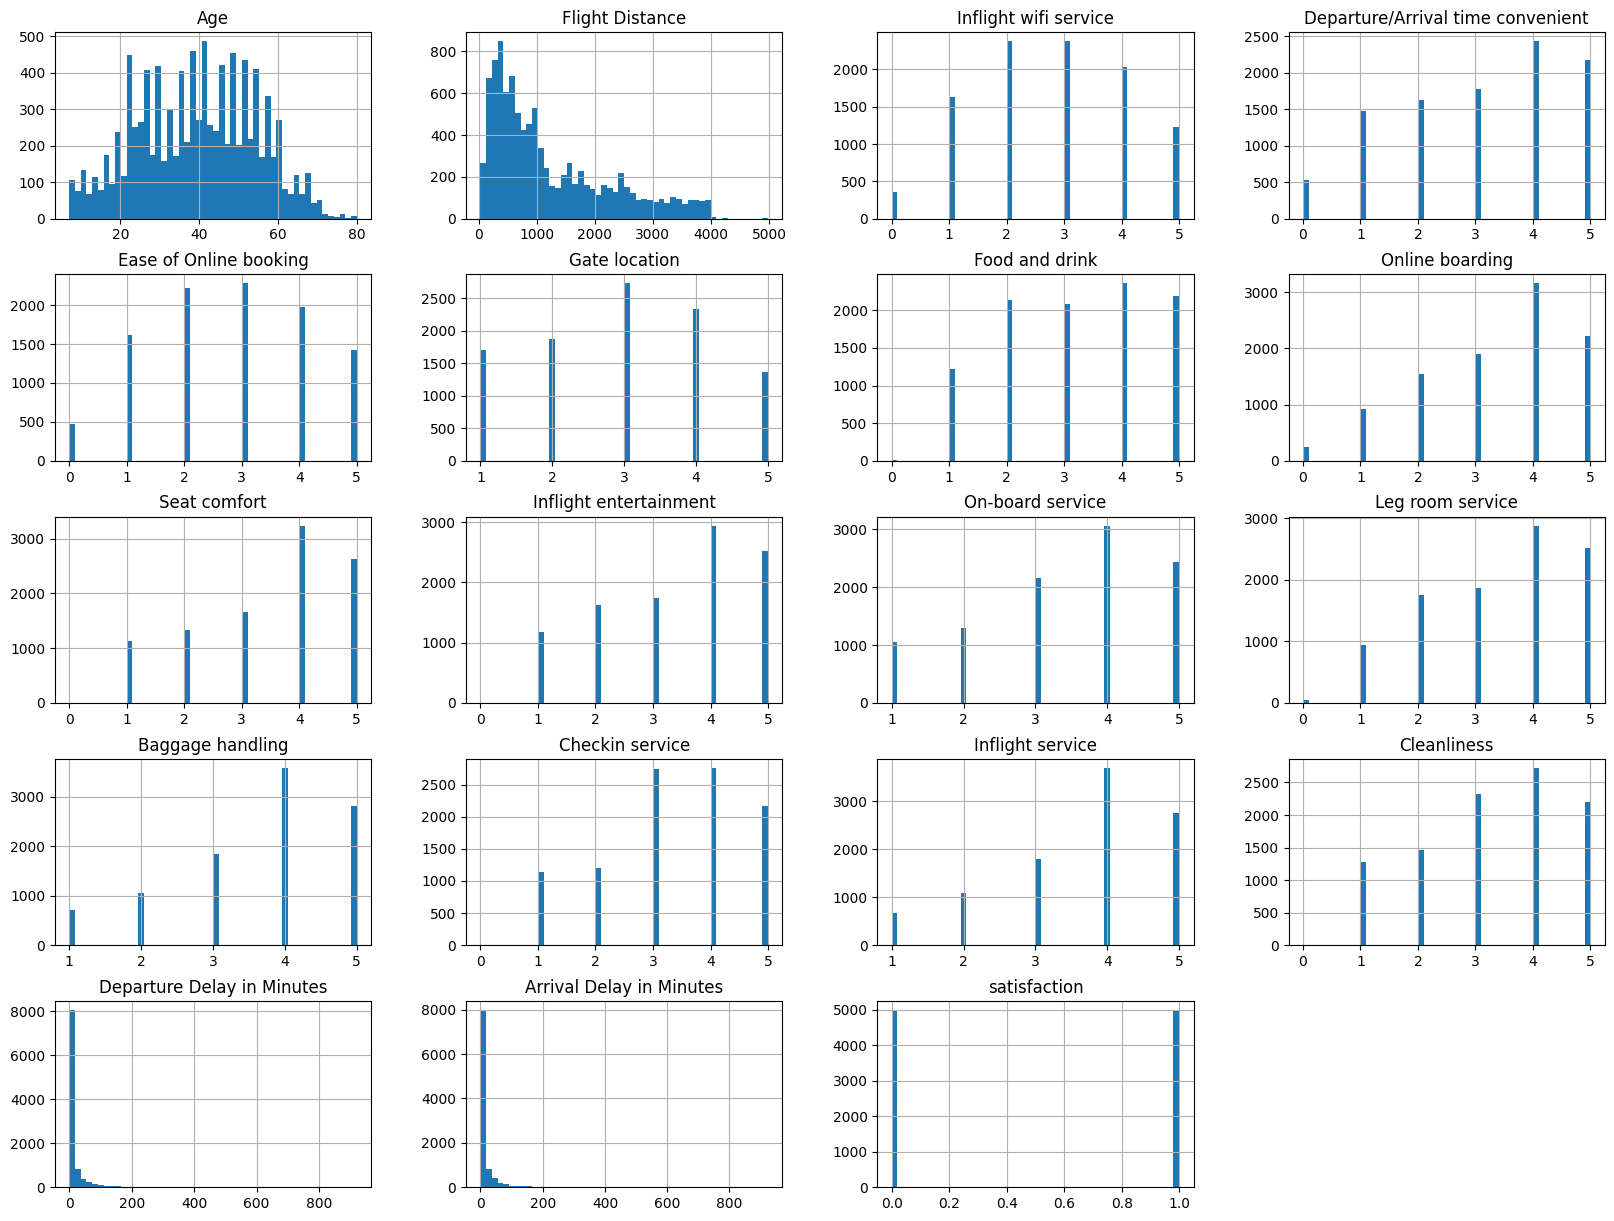

In [70]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
# There is small number of NaN values in the train_df
train_df.isna().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [72]:
# I just used backfill method
train_df.bfill(inplace=True)

In [73]:
# Checking if there are any NaN values.
train_df.isna().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [74]:
encode_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
label_encoder = LabelEncoder()

for column in encode_cols:
    train_df[column] = label_encoder.fit_transform(train_df[column])


In [75]:
# Columns to change
int_columns = ["Online boarding", 'Inflight entertainment', 'Seat comfort', 'On-board service','Leg room service','Cleanliness','Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service', 'Food and drink' , "Ease of Online booking","Age"]

data = train_df[encode_cols + int_columns + ['satisfaction']]
data.head()

,Gender,Customer Type,Type of Travel,Class,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Flight Distance,Inflight wifi service,Baggage handling,Inflight service,Checkin service,Food and drink,Ease of Online booking,Age,satisfaction
0,1,1,0,1,2,4,4,3,1,4,571,2,3,3,4,4,2,33,0
1,0,0,0,0,5,5,4,5,5,3,1431,4,5,5,3,3,4,49,1
2,0,0,0,1,4,1,3,1,1,2,867,1,1,1,1,4,4,43,0
3,0,0,0,0,2,2,2,4,4,2,1550,3,5,4,5,2,3,27,1
4,1,0,1,1,3,4,4,5,2,4,526,3,5,5,3,4,3,11,0


In [76]:
train_df.drop(encode_cols, axis=1).corrwith(train_df.satisfaction).abs().sort_values(ascending=False)

,0
satisfaction,1.000000
Online boarding,0.504986
Inflight entertainment,0.400900
Seat comfort,0.342294
On-board service,0.326426
Leg room service,0.324368
Cleanliness,0.310338
Flight Distance,0.298703
Inflight wifi service,0.277395
Baggage handling,0.247965


In [77]:
# This will prepare data for model training.
X = data.drop(columns='satisfaction')
y = data.satisfaction

In [79]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
# I use RandomForest due to its best accuracy compared to other classifiers
RF = RandomForestClassifier()

In [81]:
# Training RandomForest
RF.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
# Predicting
y_pred = RF.predict(X_test)

In [83]:
# Evaluate the RandomForest classifier
print("\nRandomForest classifier Evaluation:")
print("Accuracy Score:", round(metrics.accuracy_score(y_test, y_pred)*100), "%")
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))


RandomForest classifier Evaluation:
Accuracy Score: 95 %
RMSE: 0.23345235059857505
MAE: 0.0545


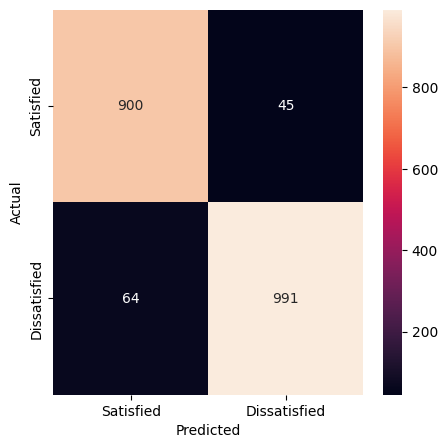

In [84]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d',
            xticklabels=['Satisfied', 'Dissatisfied'],
            yticklabels=['Satisfied', 'Dissatisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.9458587226359738


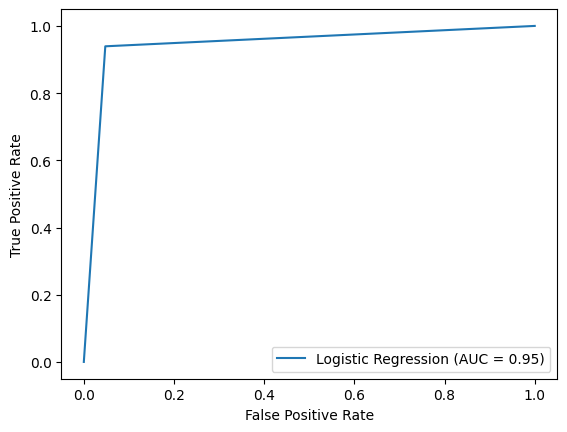

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

In [86]:
test_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,...,4,4,1,4,2,3,1,4,29,36.0
3996,3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,...,2,2,3,2,4,2,3,2,0,0.0
3997,3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,...,2,2,1,1,2,2,3,2,23,45.0
3998,3999,Male,Loyal Customer,23,Business travel,Eco,978,5,2,2,...,4,5,1,5,1,1,3,5,0,0.0


In [88]:
test_dataset = test_df[encode_cols + int_columns]
test_dataset.head()
encoded_test = pd.get_dummies(test_dataset, columns=encode_cols)
encoded_test.head()

,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Flight Distance,Inflight wifi service,Baggage handling,Inflight service,...,Age,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,3,2,5,4,4,5,2704,2,3,1,...,25,True,False,True,False,False,True,False,True,False
1,4,2,4,2,2,3,1623,1,2,2,...,49,True,False,True,False,True,False,True,False,False
2,5,5,5,5,5,4,338,4,5,5,...,51,False,True,True,False,True,False,True,False,False
3,0,5,1,4,4,5,95,0,1,3,...,34,False,True,True,False,True,False,False,False,True
4,5,5,5,4,5,5,602,4,4,5,...,34,False,True,True,False,False,True,False,True,False


In [91]:
submission_df = pd.DataFrame({
    'id': np.arange(1, len(y_pred) + 1),  # Create an 'id' column starting from 1 to the length of y_pred
    'satisfaction': y_pred                # 'satisfaction' column with predictions
})

# Save the DataFrame to a CSV file named 'submission.csv'
submission_df.to_csv("submission.csv", index=False)  # index=False to avoid writing row numbers as an additional column

In [92]:
pd.read_csv('submission.csv')

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,1
1996,1997,0
1997,1998,0
1998,1999,0
